In [6]:
import pandas as pd

In [7]:
url = 'https://raw.githubusercontent.com/dejair-dev/challenge-telecom-x-parte2/refs/heads/main/dados_tratados.csv'
df = pd.read_csv(url, sep=',')
df


,PlanoCancelado,MesesContrato,TipoContrato,ClienteSenior,PagamentoPapel,MetodoPagamento,TotalServicosPorMes,TotalGasto,Contas_Diarias
0,0,72,Bienal,0,1,Transferencia Bancaria (Automatico),118.75,8672.45,3.96
1,0,71,Bienal,0,1,Cheque Eletronico,118.65,8477.60,3.96
2,0,61,Anual,0,1,Cheque Eletronico,118.60,7365.70,3.95
3,0,68,Bienal,0,0,Cheque Correio,118.60,7990.05,3.95
4,1,67,Anual,0,1,Transferencia Bancaria (Automatico),118.35,7804.15,3.94
...,...,...,...,...,...,...,...,...,...
7262,0,25,Bienal,0,1,Cheque Correio,18.70,383.65,0.62
7263,0,53,Bienal,0,0,Cheque Correio,18.70,1005.70,0.62
7264,0,36,Bienal,0,1,Cartao de Credito (Automatico),18.55,689.00,0.62
7265,0,59,Bienal,0,0,Transferencia Bancaria (Automatico),18.40,1057.85,0.61


In [8]:


df = pd.get_dummies(df, columns=['TipoContrato', 'MetodoPagamento'])


proporcao = df['PlanoCancelado'].value_counts(normalize=True) * 100
proporcao.name = 'proportion'
print(proporcao)



PlanoCancelado
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separando features e target
X = df.drop('PlanoCancelado', axis=1)
y = df['PlanoCancelado']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# proporção após SMOTE
import pandas as pd
print(pd.Series(y_train_bal).value_counts(normalize=True) * 100)

PlanoCancelado
0    50.0
1    50.0
Name: proportion, dtype: float64


In [11]:
from sklearn.preprocessing import StandardScaler

# Selecionando colunas numéricas
num_cols = X_train_bal.select_dtypes(include=['int64', 'float64']).columns

# Criando scaler
scaler = StandardScaler()

# Aplicar padronização
X_train_bal[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

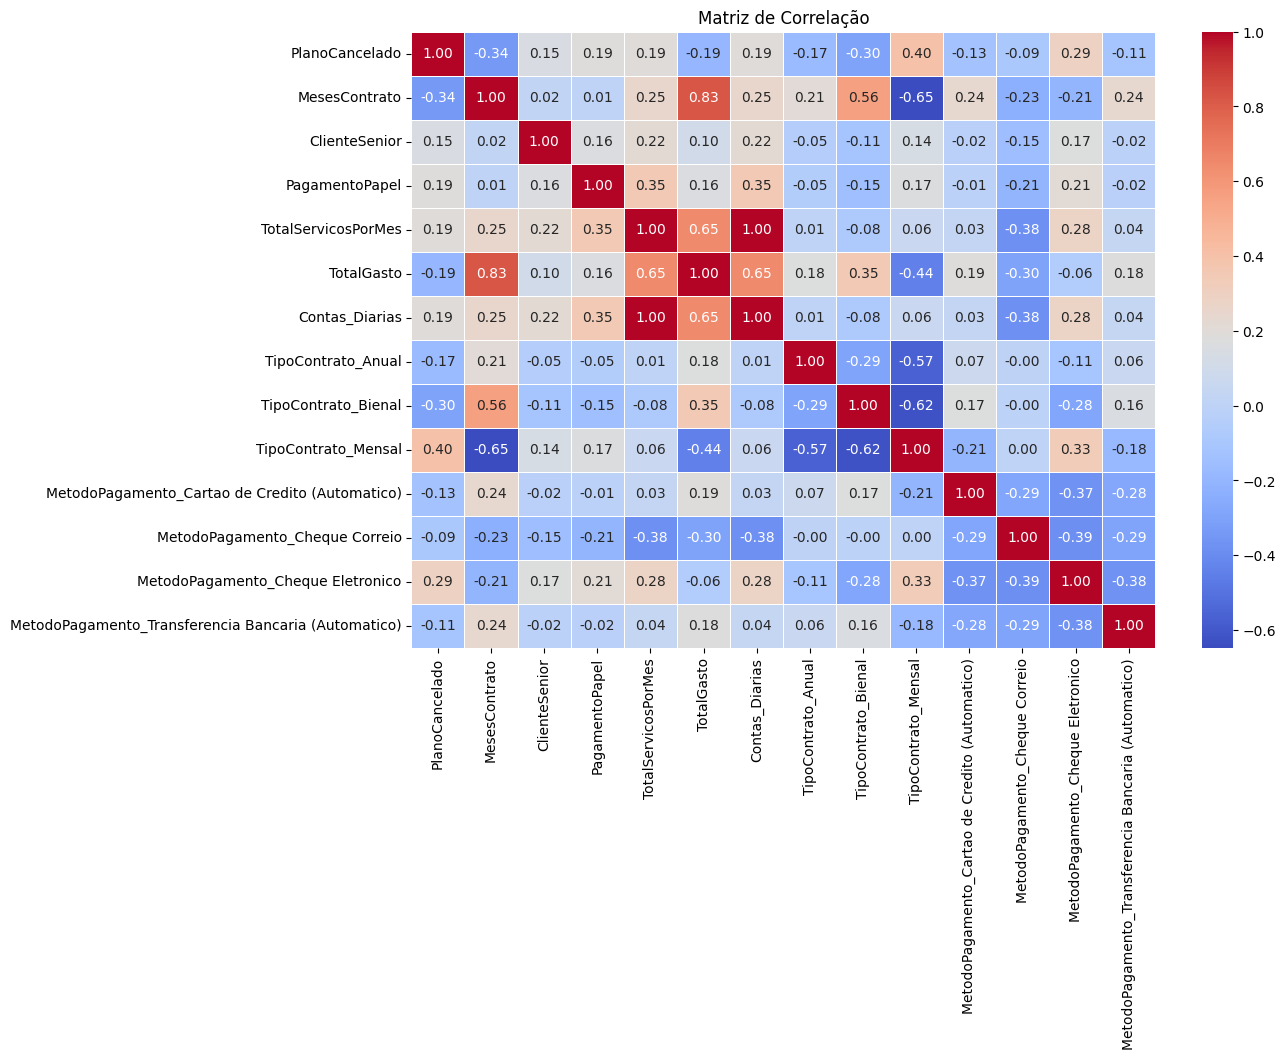

Correlação com evasão:
 PlanoCancelado                                         1.000000
TipoContrato_Mensal                                    0.395584
MetodoPagamento_Cheque Eletronico                      0.294626
Contas_Diarias                                         0.189918
TotalServicosPorMes                                    0.189866
PagamentoPapel                                         0.186666
ClienteSenior                                          0.146733
MetodoPagamento_Cheque Correio                        -0.090061
MetodoPagamento_Transferencia Bancaria (Automatico)   -0.114767
MetodoPagamento_Cartao de Credito (Automatico)        -0.131085
TipoContrato_Anual                                    -0.173958
TotalGasto                                            -0.193345
TipoContrato_Bienal                                   -0.295138
MesesContrato                                         -0.344079
Name: PlanoCancelado, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# matriz de correlação
corr_matrix = df.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

print("Correlação com evasão:\n", corr_matrix['PlanoCancelado'].sort_values(ascending=False))

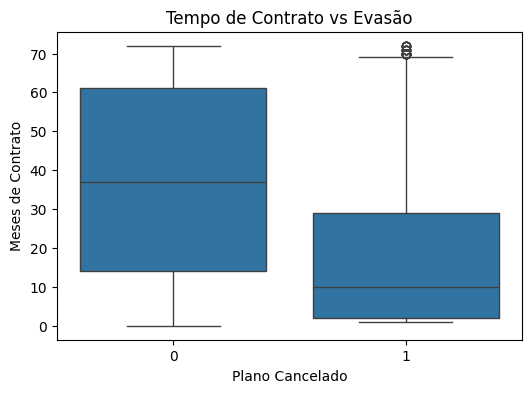

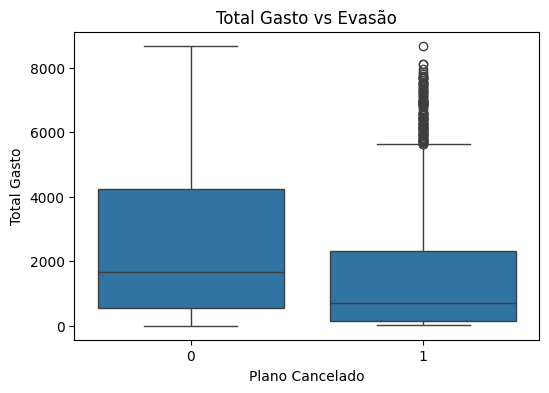

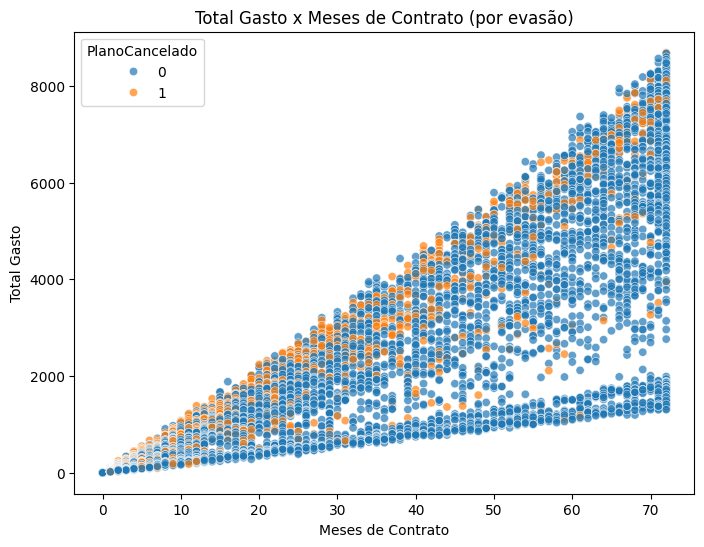

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tempo de contrato
plt.figure(figsize=(6,4))
sns.boxplot(x='PlanoCancelado', y='MesesContrato', data=df)
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Plano Cancelado')
plt.ylabel('Meses de Contrato')
plt.show()

# Total gasto
plt.figure(figsize=(6,4))
sns.boxplot(x='PlanoCancelado', y='TotalGasto', data=df)
plt.title('Total Gasto vs Evasão')
plt.xlabel('Plano Cancelado')
plt.ylabel('Total Gasto')
plt.show()

# Scatter plot TotalGasto
plt.figure(figsize=(8,6))
sns.scatterplot(x='MesesContrato', y='TotalGasto', hue='PlanoCancelado', data=df, alpha=0.7)
plt.title('Total Gasto x Meses de Contrato (por evasão)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Total Gasto')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Separarando features e target
X = df.drop('PlanoCancelado', axis=1)
y = df['PlanoCancelado']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando tamanhos
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

Treino: 5813 amostras
Teste: 1454 amostras


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Normalizando colunas numéricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# Regressão Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Avaliando
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_logreg))

=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1093
           1       0.63      0.52      0.57       361

    accuracy                           0.80      1454
   macro avg       0.74      0.71      0.72      1454
weighted avg       0.79      0.80      0.80      1454



In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separando features e target
X = df.drop('PlanoCancelado', axis=1)
y = df['PlanoCancelado']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando colunas numéricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Regressão Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predições
y_pred = logreg.predict(X_test)

Acurácia: 0.8040
Precisão: 0.6267
Recall: 0.5208
F1-score: 0.5688


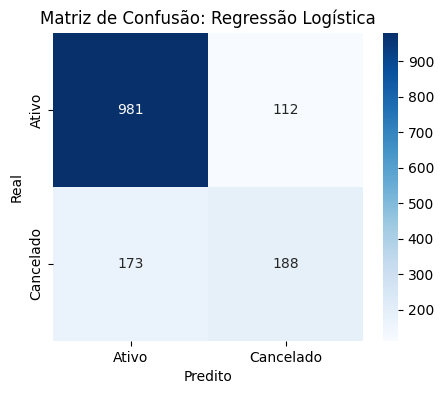

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ativo','Cancelado'], yticklabels=['Ativo','Cancelado'])
plt.title('Matriz de Confusão: Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [18]:
import pandas as pd
import numpy as np

# Obter coeficientes e nomes das variáveis
coef = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': logreg.coef_[0]
})

# Calcular o efeito absoluto (maior valor absoluto indica maior impacto)
coef['Impacto Absoluto'] = np.abs(coef['Coeficiente'])

# Ordenar pelas variáveis mais relevantes
coef.sort_values(by='Impacto Absoluto', ascending=False, inplace=True)
print(coef)

                                             Variável  Coeficiente  \
0                                       MesesContrato    -1.312829   
7                                 TipoContrato_Bienal    -1.223181   
10                     MetodoPagamento_Cheque Correio    -0.532120   
4                                          TotalGasto     0.480295   
8                                 TipoContrato_Mensal     0.442407   
6                                  TipoContrato_Anual    -0.416537   
9      MetodoPagamento_Cartao de Credito (Automatico)    -0.392484   
12  MetodoPagamento_Transferencia Bancaria (Automa...    -0.336070   
5                                      Contas_Diarias     0.273175   
3                                 TotalServicosPorMes     0.261792   
2                                      PagamentoPapel     0.202167   
1                                       ClienteSenior     0.150970   
11                  MetodoPagamento_Cheque Eletronico     0.063362   

    Impacto Absolut

/tmp/ipython-input-3739885397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto Absoluto', y='Variável', data=coef, palette='viridis')


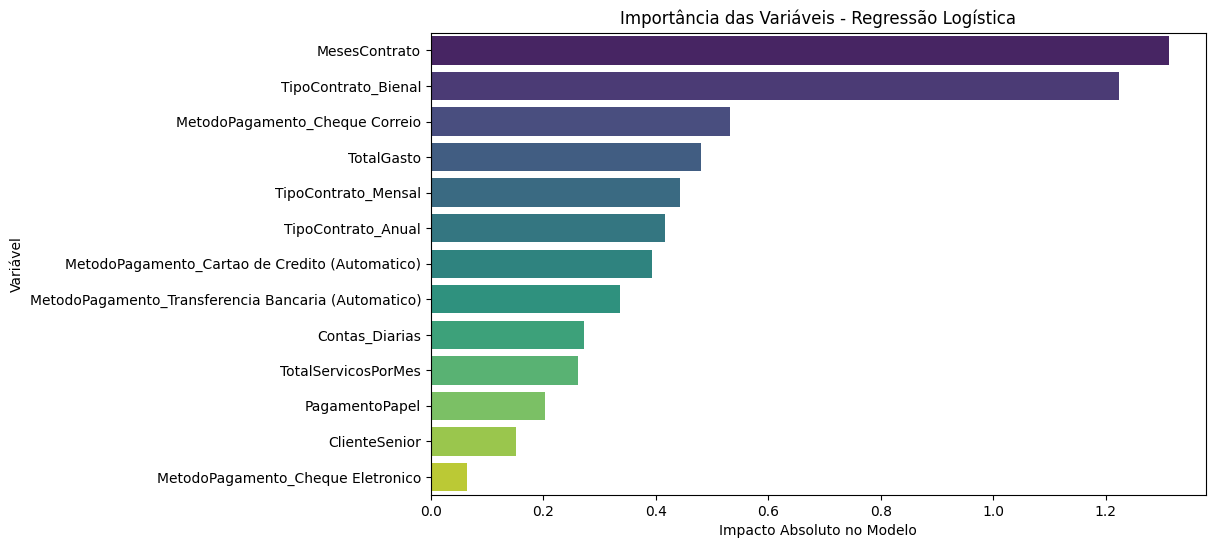

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Impacto Absoluto', y='Variável', data=coef, palette='viridis')
plt.title('Importância das Variáveis - Regressão Logística')
plt.xlabel('Impacto Absoluto no Modelo')
plt.ylabel('Variável')
plt.show()

#📄Relatorio Final



Na evasão de clientes foi utilizado a Regressão Logística, permitindo prever cancelamentos e interpretar o impacto de cada variável.

No modelo conseguimos verificar métricas consistentes, o que indica uma boa capacidade de identificar clientes que cancelam e os que permanecem ativos.

As variáveis mais relevantes foram tempo de contrato, total gasto, tipo de contrato, método de pagamento e perfil senior.

Os insights ajudam a empresa a reduzir a evasão e ajuda conhecer clientes valiosos para focar na fidelização.
